In [6]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [7]:
options = {
    'model': 'cfg/yolo-voc-c1.cfg',
    'load': 76260,
    'threshold': 0.1
}

tfnet = TFNet(options)

Parsing cfg/yolo-voc-c1.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 52, 52, 128)
 Init  |

In [8]:
img = cv2.imread('wh.jpg')
result = tfnet.return_predict(img)

result

[{'label': 'didlo',
  'confidence': 0.46701184,
  'topleft': {'x': 50, 'y': 99},
  'bottomright': {'x': 175, 'y': 221}}]

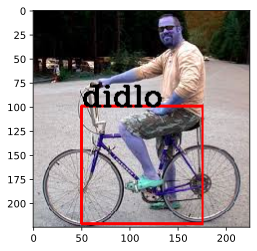

IndexError: list index out of range

In [9]:
tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']

# add the box and label and display it
img = cv2.rectangle(img, tl, br, (255, 0, 0), 2)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()

tl = (result[1]['topleft']['x'], result[1]['topleft']['y'])
br = (result[1]['bottomright']['x'], result[1]['bottomright']['y'])
label = result[1]['label']

# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 0, 255), 2)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()

tl = (result[2]['topleft']['x'], result[2]['topleft']['y'])
br = (result[2]['bottomright']['x'], result[2]['bottomright']['y'])
label = result[2]['label']

# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 2)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()